In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.tsatools import lagmat


/Users/idil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [54]:
#Here as an input I am using the 

pe_file = pd.read_csv("pe_data_swiss.mat", header=None, sep = '\\t', skiprows=5)[0]

(252, 83)

some fields you should define here. num_TR is how many TRs does each trial/condition have. num_cycles is how
many repeats of the sequence you have != number of conditions within a sequence, even though in my example they are the same
Num_models is something you should calculate: the idea with travelling wave is that all the generated models
should cover the entire sequence.

So 32 models here=> 32 iterations of one TR = 4* 8 = number of conditions within
a sequence * #TR of each condition

In [2]:
num_TR = 4
num_models = 32
num_cycles= 8 

## selecting a model wave: need to do this by visually inspecting, i normally go for inner sections. The length of the wave needs to match the # of models you want to end up with 

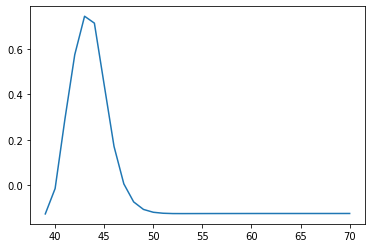

In [7]:
plt.plot(pe_file.loc[39:70])

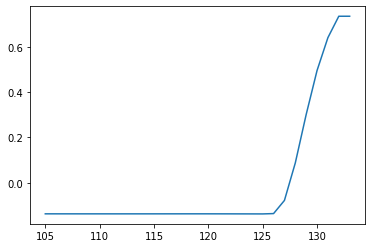

In [11]:
plt.plot(pe_file.loc[105:133])

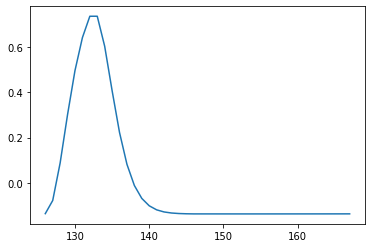

In [12]:
plt.plot(pe_file.loc[126:167])

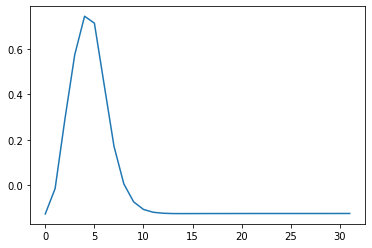

In [43]:
plt.plot(pe_wave)

In [42]:
#selecting my wave
pe_wave = pe_file.loc[39:70]
pe_wave = np.array(pe_wave)

## creating a full length wave model out of this selected wave

In [49]:
pe_wave_model_orig = np.tile(pe_wave,num_cycles)



In the code below


The additional values added to the end are representing an additional trial is
to make sure in lagging we can capture some very late hemodynamic responses. 
The reason we use the mean of last values to fill these new columns is that when we cycle around 
using the lagmat function, the pushed and 
now empty rows do not take the value of 0 as the baseline should be(as it seems) negative

In [69]:
pe_wave_model = np.append(pe_wave_model_orig, np.repeat(np.mean(pe_wave[(-1*num_TR):-1]), num_TR))


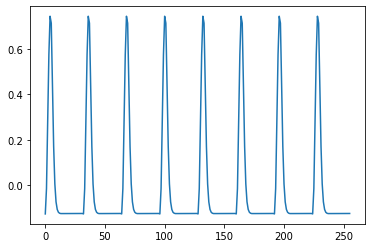

In [70]:
plt.plot(pe_wave_model_orig)

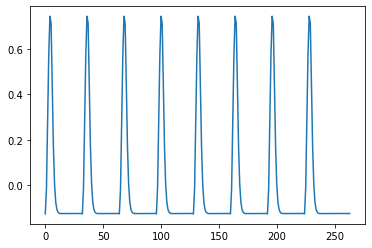

In [52]:
plt.plot(pe_wave_model)

### creating lag models out of it:
### 1) iterate shifting
### 2) then cover the zero initial values with cycling the end 
(so ex: {1 2 3 4 5} {5 1 2 3 4} {4 5 1 2 3} ...)

In [72]:
pe_model = pd.DataFrame(lagmat(pe_wave_model, maxlag= num_models, trim = "none"))

In [76]:
pe_model = pe_model.astype(float)

In [77]:
#this covers the now empty beginning values with pushed out values from the end

for i in range(num_models):
    pe_model.iloc[0:(i+1),i] = np.array(pe_model.iloc[(len(pe_wave_model)-1):(len(pe_wave_model)+i),i])


Below, need to cut it at the end to not have the pushed away extra bits. 
The length should be the whole run: num_TR * num_models * num_cycles 
and we should add one condition worth TRs--refer to how pe_wave_model is created

In [89]:
total_num_slices = num_TR * num_models * num_cycles + num_models
pe_model = pe_model[0:total_num_slices]

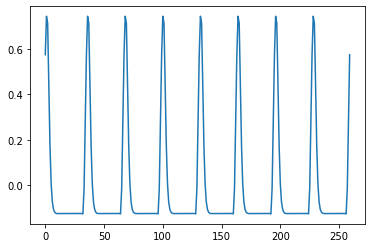

In [102]:
plt.plot(pe_model[31])

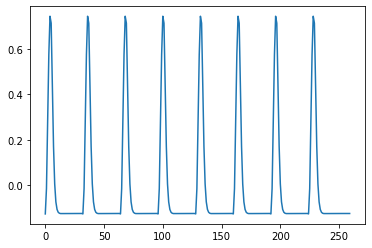

In [103]:
plt.plot(pe_wave_model)

## split and save the models

In [83]:
for i in range(num_models - 1):
    b = i+2
    np.savetxt("pe_01", pe_wave_model)
    np.savetxt("pe_0{}".format(b), pe_model[i])
    